<a href="https://colab.research.google.com/github/rogersm92/Machine_Learning/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this quick tutorial I'll show how to find the relationship between the price and the number of rooms from the Boston database, contained in the Scikit-learn datasets (testing and learning datasets).

In [1]:
# basic libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Number of Instances: 506 means that the graph will contain **506 data points**. This means that Boston has 506 urban zones, each one containing its own parameters regarding price (Y) and the rest of attributes (X). Note that Y is the target attribute we want to predict. 
<br></br>
Like I said before, we'll work with the attribute **RM** (average number of rooms per dwelling)

In [3]:
X = boston.data[:, 5] # Column 5 is the column that contains the RM (average number of rooms) parameter. We saw it before using DESCR method.
# In python [:] means select ALL, //check Python Official Docs: 3.1.3. Lists//
Y = boston.target


In [4]:
# But in ML we like to work with Arrays! So we'll convert the lists into arrays like this:
X = np.array(X) # We could have done this with X = np.array(boston.data[:, 5])
Y = np.array(Y) # We could have done this with X = np.array(boston.target)
# Now we have 2 matrixes, X and Y

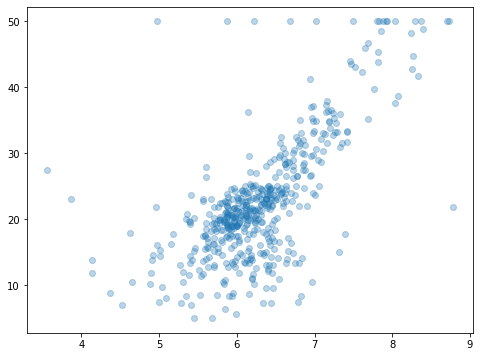

In [5]:
# Now we can represent the values inside a graph
# We can manipulate the parameters to alter the visualization, check https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html 
plt.figure(figsize=(8, 6)) # For the sake of this tutorial, I'll expand the size of the graph, check https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
plt.scatter(X, Y, alpha = 0.3)
# Thanks to the alpha parameter, we can see where most points tend to join together.

In [6]:
# Now it's time to define and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
# And then fit it
model.fit(X, Y)


ValueError: ignored

In [8]:
# What happened before is because right now we have 506 columns and 1 row, we need to reshape that
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
print("Shape of X", X.shape)
print("Shape of Y", Y.shape)

Shape of X (506,)
Shape of Y (506,)


In [9]:
X = X.reshape(-1, 1)
print(X.shape)
Y = Y.reshape(-1, 1)
print(Y.shape)

(506, 1)
(506, 1)


In [10]:
# Now we can train/fit the model properly:
model.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.score(X, Y) # Evaluating the model

0.4835254559913343

When we first saw the graph, we could see that the model will not be 100% precise, that's why the score is so low

In [36]:
# Predictions array
price_prediction = model.predict(X)
print(price_prediction[:10]) # Print first 10 predictions

[[25.17574577]
 [23.77402099]
 [30.72803225]
 [29.02593787]
 [30.38215211]
 [23.85593997]
 [20.05125842]
 [21.50759586]
 [16.5833549 ]
 [19.97844155]]


In [41]:
# Here are some random predictions

some_rooms = np.array(6).reshape(1, -1)

def test_predictions(number_of_rooms):
    cost_prediction = model.predict(number_of_rooms)
    print(cost_prediction)
    
test_predictions(some_rooms)            

[[19.94203311]]


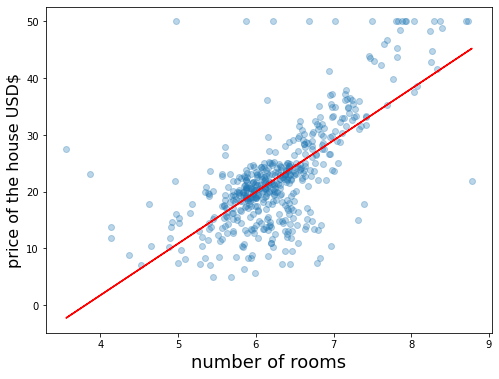

In [43]:
# Finally, we will be able to see the linear regression in our graph

plt.figure(figsize=(8, 6))
plt.xlabel('number of rooms', fontsize=18)
plt.ylabel('price of the house USD$', fontsize=16)
plt.scatter(X, Y, alpha = 0.3)
plt.plot(X, price_prediction, color='red')

plt.show()

